In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic/Iris.csv


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
print(os.listdir('/kaggle/input'))

data = pd.read_csv('/kaggle/input/logistic/Iris.csv')
df = pd.DataFrame(data)
print(df.head())

df.shape

['logistic']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


(150, 6)

In [4]:
missing_values = df.isna().sum()
missing_values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# converting multi-class classification into n=binary classification
df = df[df['Species'] != 'Iris-setosa']

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df['Species'] = df['Species'].map({'Iris-virginica':0, 'Iris-versicolor':1})
df['Species']

50     1
51     1
52     1
53     1
54     1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 100, dtype: int64

In [8]:
y = df['Species']
x = df.drop(["Species"], axis=1)


y


50     1
51     1
52     1
53     1
54     1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 100, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train
y_train

65     1
90     1
146    0
59     1
122    0
      ..
110    0
121    0
64     1
142    0
101    0
Name: Species, Length: 75, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50,60,70,80],'max_iter':[100,200,300]}

logisticcv = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)




In [12]:
logisticcv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60, 70,
                               80],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [13]:
print(logisticcv.best_params_)


{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [14]:
print(logisticcv.best_score_)

1.0


In [15]:
y_pred= logisticcv.predict(x_test)

y_pred


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0])

In [16]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred,y_test)
score

1.0

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

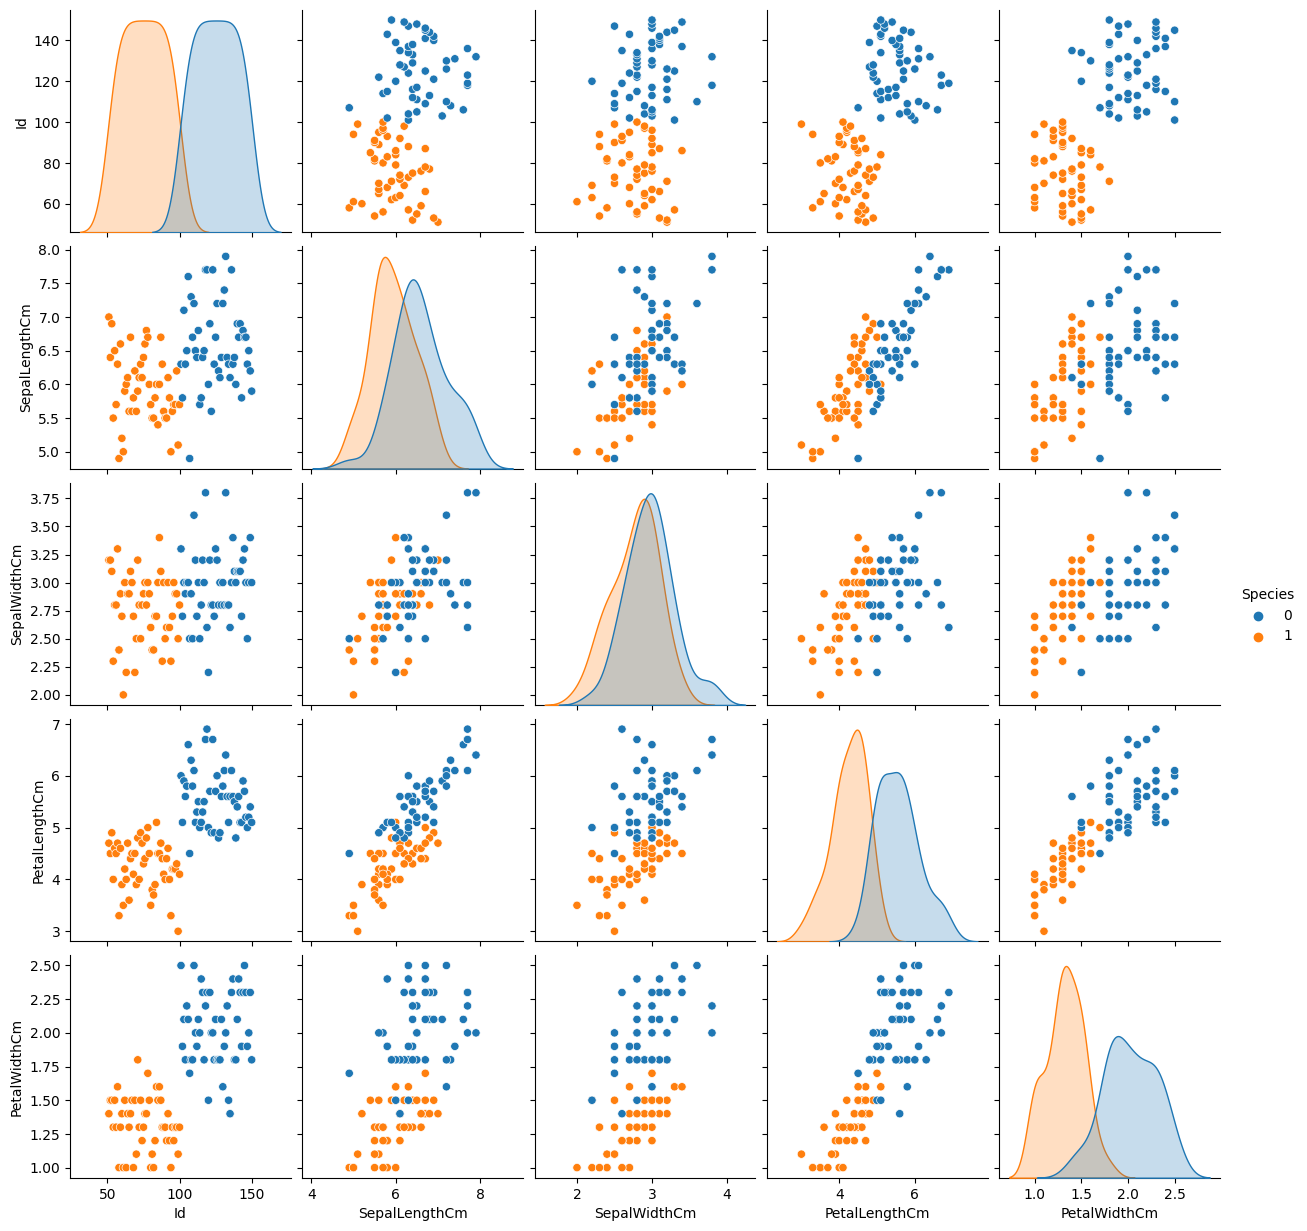

In [18]:
# EDA
sns.pairplot(df,hue='Species')

In [19]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.373000,0.279165,0.620325,0.703528,-0.866069
SepalLengthCm,0.373000,1.000000,0.553855,0.828479,0.593709,-0.494305
SepalWidthCm,0.279165,0.553855,1.000000,0.519802,0.566203,-0.308080
PetalLengthCm,0.620325,0.828479,0.519802,1.000000,0.823348,-0.786424
PetalWidthCm,0.703528,0.593709,0.566203,0.823348,1.000000,-0.828129
Species,-0.866069,-0.494305,-0.308080,-0.786424,-0.828129,1.000000
